NameError: name 'x_range2' is not defined

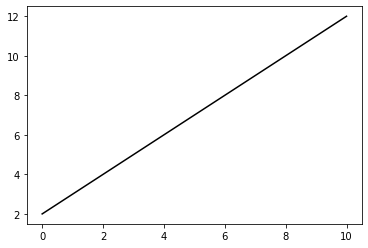

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def generatedDataSet (a, b, xmin, xmax, n, alpha, sigma):
    x_range = np.linspace(xmin, xmax, n)
    yactual = a * x_range + b
    plt.plot(x_range, yactual, color='black', label='y = ax + b')
    x_range1 = np.linspace(xmin, xmax,int(n*(1-alpha)))
    noise = sigma * np.random.normal(0, 1.5, int((1-alpha)*len(x_range)))
    
    ynoisy = a * x_range1 + b + noise
    x_range2 = np.linspace(xmin, xmax,int(n*(alpha)))
    youtlier = outlierCorruption(ynoisy,alpha)
    
    plt.scatter(x_range1, ynoisy, color='blue', label='Inliers')
    plt.scatter(x_range2, youtlier, color='red', label='Outliers')
    plt.legend()
    plt.grid()
    plt.show()
    x = np.concatenate((x_range1, x_range2))
    y = np.concatenate((ynoisy, youtlier))
    return x, y

def outlierCorruption(ynoisy,alpha):
    noise1 = sigma * np.random.normal(0, 1, int(alpha*len(x_range)))
    for i in range(int(alpha*len(x_range))):
            if noise1[i] < 6 and noise1[i] > 0:
                noise1[i] = noise1[i]+5
            elif noise1[i] > -6 and noise1[i] < 0:
                noise1[i] = noise1[i]-5
    youtlier = a * x_range2 + b + noise1
    return youtlier
    

a, b, xmin, xmax, n, alpha, sigma = 1, 2, 0, 10, 100, 0.2, 1
x,y=generatedDataSet (a, b, xmin, xmax, n, alpha, sigma)  




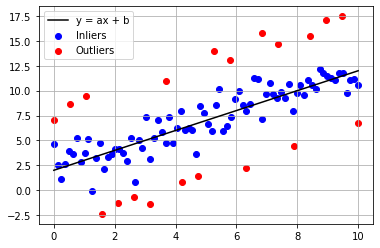

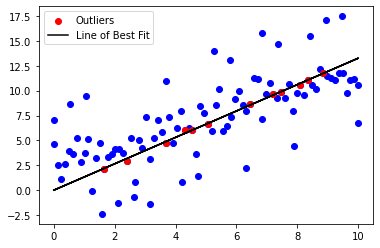

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def regression_diagnostics(x, y, alpha=0.1, max_iterations=100, stop_threshold=0.05):
    n = len(x)
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    inlier_indices = np.array(range(n))

    for iteration in range(max_iterations):
        # Fit a line with parameters using input dataset
        params = np.linalg.lstsq(x[inlier_indices], y[inlier_indices], rcond=None)[0]

        # Compute error
        y_pred = x.dot(params)
        residuals = y - y_pred

        # Compute second order statistics from error
        squared_residuals = residuals ** 2
        mean_squared_error = squared_residuals.mean()

        # Define threshold for outlier rejection
        s = np.sqrt(mean_squared_error)
        outlier_threshold = alpha * s

        # Construct set of outliers to be rejected
        outliers = np.abs(residuals) > outlier_threshold
        inlier_indices = np.array([i for i, is_inlier in enumerate(~outliers) if is_inlier])

        # Terminate if the number of inliers has not changed
        if len(inlier_indices) == n:
            break

        # Terminate if the change in inlier count is below the stop threshold
        change = (n - len(inlier_indices)) / n
        if change < stop_threshold:
            break

        # Update number of inliers
        n = len(inlier_indices)

    # Plot the final line obtained
    plt.scatter(x, y, c='blue')
    plt.scatter(x[~outliers], y[~outliers], c='red', label='Outliers')
    plt.plot(x, y_pred, c='black', label='Line of Best Fit')
    plt.legend()
    plt.show()

# Example usage
a, b, xmin, xmax, n, alpha, sigma = 1, 2, 0, 10, 100, 0.2, 1
x,y = generatedDataSet (a, b, xmin, xmax, n, alpha, sigma)
regression_diagnostics(x, y, alpha=0.1)
   

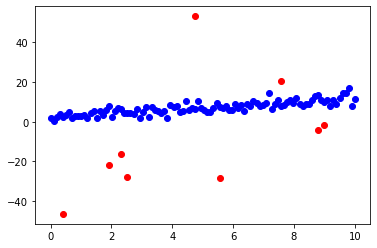

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def generateDataset(a, b, xmin, xmax, n, alpha, sigma):
    x = np.linspace(xmin, xmax, n)
    yactual = a * x + b
    ynoisy = yactual + sigma * np.random.randn(n)
    outliers = np.random.randint(0, n, int(alpha * n))
    youtlier = ynoisy.copy()
    youtlier[outliers] = youtlier[outliers] + 100 * (np.random.rand(len(outliers)) - 0.5)
    return x, ynoisy, youtlier

def plotDataset(x, ynoisy, youtlier):
    plt.scatter(x, ynoisy, c='blue')
    plt.scatter(x[np.abs(youtlier - ynoisy) > 5 * sigma], youtlier[np.abs(youtlier - ynoisy) > 5 * sigma], c='red')
    plt.show()

# example usage
a, b, xmin, xmax, n, alpha, sigma = 1, 2, 0, 10, 100, 0.1, 2
x, ynoisy, youtlier = generateDataset(a, b, xmin, xmax, n, alpha, sigma)
plotDataset(x, ynoisy, youtlier)


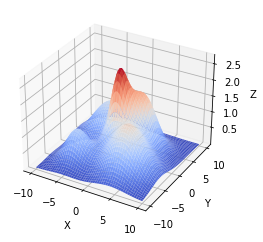

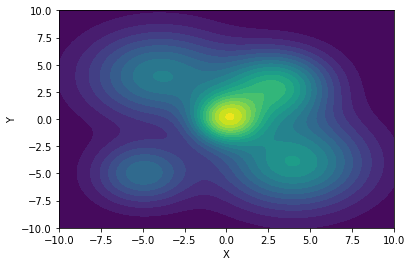

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    z = 1.7 * np.exp(-((x - 3)**2 / 10 + (y - 3)**2 / 10)) + np.exp(-((x + 5)**2 / 8 + (y + 5)**2 / 8)) + 2 * np.exp(-((x**2) / 4 + (y**2) / 5)) + 1.5 * np.exp(-((x - 4)**2 / 18 + (y + 4)**2 / 16)) + 1.2 * np.exp(-((x + 4)**2 / 18 + (y - 4)**2 / 16))
    return z

xmin, xmax, ymin, ymax = -10, 10, -10, 10
x, y = np.linspace(xmin, xmax, 400), np.linspace(ymin, ymax, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

plt.contourf(X, Y, Z, levels=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Maxima: (-4.53, -5.67, 0.95)


TypeError: Input z must be 2D, not 1D

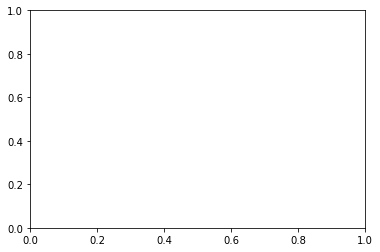

In [6]:
import numpy as np

def gradient(x, y):
    eps = 1e-5
    z = f(x, y)
    dzdx = (f(x + eps, y) - z) / eps
    dzdy = (f(x, y + eps) - z) / eps
    return dzdx, dzdy

def gradient_ascent(x0, y0, alpha, iterations):
    x = x0
    y = y0
    for i in range(iterations):
        dzdx, dzdy = gradient(x, y)
        x += alpha * dzdx
        y += alpha * dzdy
    return x, y

x0 = np.random.uniform(-10, 10)
y0 = np.random.uniform(-10, 10)
alpha = 0.1
iterations = 100

x, y = gradient_ascent(x0, y0, alpha, iterations)
print("Maxima: (%.2f, %.2f, %.2f)" % (x, y, f(x, y)))

# plot the trajectory of ascent solutions on the contour plot
plt.contourf(X, Y, Z, levels=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x0, y0, 'o', color='red', markersize=5)
plt.plot(x, y, 'o', color='red', markersize=10)
plt.show()


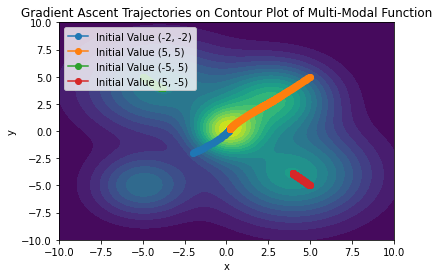

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  z = 1.7 * np.exp(-((x - 3)**2)/10 - ((y - 3)**2)/10) + np.exp(-((x + 5)**2)/8 - ((y + 5)**2)/8) + 2 * np.exp(-((x**2)/4 + (y**2)/5)) + 1.5 * np.exp(-((x - 4)**2)/18 - ((y + 4)**2)/16) + 1.2 * np.exp(-((x + 4)**2)/18 - ((y - 4)**2)/16)
  return z

def gradient_ascent(x, y, iterations, learning_rate):
  x_history = [x]
  y_history = [y]
  z_history = [f(x, y)]
  
  for i in range(iterations):
    dx = (f(x + 0.01, y) - f(x - 0.01, y)) / 0.02
    dy = (f(x, y + 0.01) - f(x, y - 0.01)) / 0.02
    x = x + learning_rate * dx
    y = y + learning_rate * dy
    x_history.append(x)
    y_history.append(y)
    z_history.append(f(x, y))
  
  return x_history, y_history, z_history

x_min, x_max = -10, 10
y_min, y_max = -10, 10

X, Y = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = f(X, Y)

plt.contourf(X, Y, Z, 20)

for i, (x0, y0) in enumerate(zip([-2, 5, -5, 5], [-2, 5, 5, -5])):
  x_history, y_history, z_history = gradient_ascent(x0, y0, 1000, 0.1)
  plt.plot(x_history, y_history, '-o', color='C' + str(i), label='Initial Value (' + str(x0) + ', ' + str(y0) + ')')

plt.legend(loc='upper left')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Ascent Trajectories on Contour Plot of Multi-Modal Function')
plt.show()


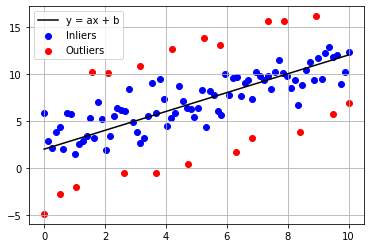

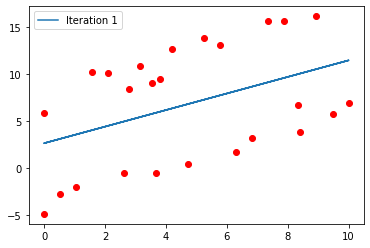

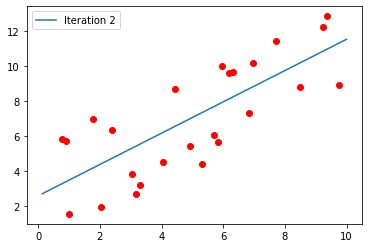

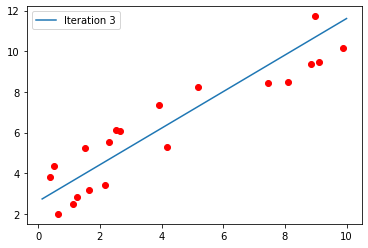

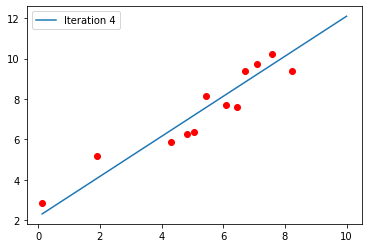

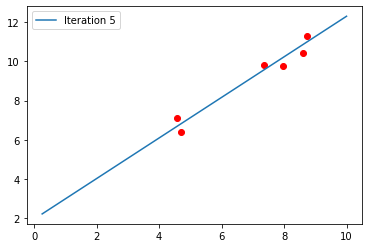

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def regression_diagnostics(x, y, alpha, Kmax):
    D = list(zip(x, y))
    k = 1
    Dk = D
    while k <= Kmax and len(Dk) > 0:
        X = np.array([x for x, y in Dk])
        Y = np.array([y for x, y in Dk])
        
        # Fit a line y = a + bx
        a, b = np.polyfit(X, Y, 1)
        
        # Compute Error
        Y_pred = a * X + b
        e = Y - Y_pred
        
        # Compute second order statistics
        mu = np.mean(e)
        sigma = np.std(e)
        
        # Identify outliers
        outliers = [idx for idx, error in enumerate(e) if abs(error - mu) >= alpha * sigma]
        
        # Plot the line and outliers
        plt.plot(X, Y_pred, label=f"Iteration {k}")
        plt.scatter(X[outliers], Y[outliers], color="red")
        
        # Construct more pure set of inliers
        Dk = [Dk[idx] for idx in range(len(Dk)) if idx not in outliers]
        k += 1
        
        plt.legend()
        plt.show()

# Example usage
a, b, xmin, xmax, n, alpha, sigma = 1, 2, 0, 10, 100, 0.2, 1
x,y = generatedDataSet (a, b, xmin, xmax, n, alpha, sigma)
regression_diagnostics(x, y, 1, 5)


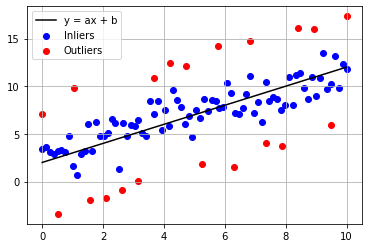

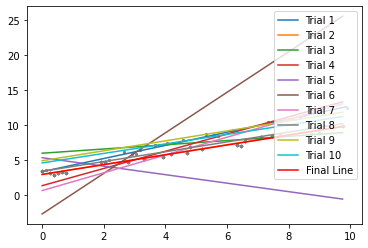

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

def ransac(x, y, n, k, t, d):
    best_fit = []
    best_error = np.inf
    for i in range(k):
        sample_indices = sample(range(len(x)), n)
        X = [x[idx] for idx in sample_indices]
        Y = [y[idx] for idx in sample_indices]
        
        # Fit a line y = a + bx
        a, b = np.polyfit(X, Y, 1)
        
        # Compute inlier count
        inlier_count = 0
        for j in range(len(x)):
            error = abs(y[j] - (a * x[j] + b))
            if error <= t:
                inlier_count += 1
                
        # Check if the current fit is better than the best fit
        if inlier_count >= d and inlier_count > len(best_fit):
            best_fit = [(x[j], y[j]) for j in range(len(x)) if abs(y[j] - (a * x[j] + b)) <= t]
            best_error = inlier_count
            
        # Plot the current fit
        X = np.array([x for x, y in best_fit])
        Y = np.array([y for x, y in best_fit])
        plt.scatter(X, Y, color="gray", s=5)
        plt.plot(X, a * X + b, label=f"Trial {i + 1}")
        
    # Plot the final line
    X = np.array([x for x, y in best_fit])
    Y = np.array([y for x, y in best_fit])
    a, b = np.polyfit(X, Y, 1)
    plt.plot(X, a * X + b, color="red", label="Final Line")
    plt.legend()
    plt.show()

# Example usage
a, b, xmin, xmax, n, alpha, sigma = 1, 2, 0, 10, 100, 0.2, 1
x,y = generatedDataSet (a, b, xmin, xmax, n, alpha, sigma)
ransac(x, y, 2, 10, 0.5, 4)
